### Importing stuff

In [1]:
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

### Getting data

#### Getting data using Datareader

In [2]:
import pandas_datareader
from pandas_datareader import data

In [3]:
netflix = data.DataReader("NFLX",
                         start = '2009-1-1',
                         end = '2019-11-08',
                         data_source='yahoo')['Adj Close']

df_nf = pd.DataFrame(netflix)

df_nf.reset_index(inplace = True)
df_nf['Date'] = pd.to_datetime(df_nf.Date)

df_nf.set_index('Date', inplace = True)
df_nf.head()

,Adj Close
Date,
2009-01-02,4.267143
2009-01-05,4.562857
2009-01-06,4.705714
2009-01-07,4.672857
2009-01-08,4.735714


In [4]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


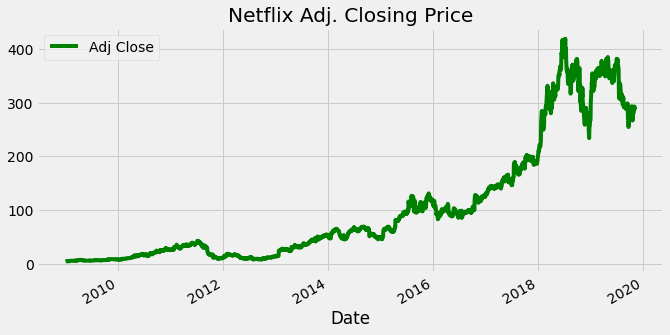

In [5]:
plt.style.use('fivethirtyeight')
df_nf.plot(title='Netflix Adj. Closing Price', figsize = (10,5), color = 'green')

plt.show()

<AxesSubplot:title={'center':'Netflix Cumulative Returns'}, xlabel='Date'>

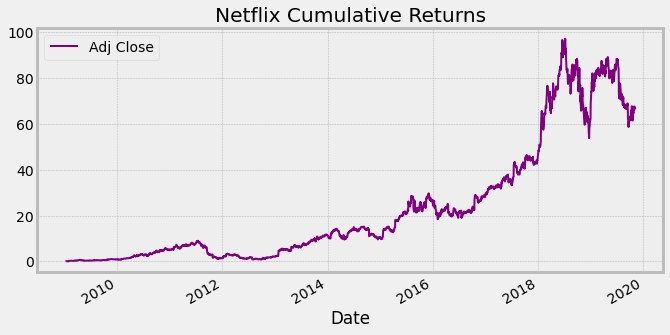

In [6]:
# Convert the adjusted closing prices to cumulative returns

# Take percentage change of stock price of Netflix
df_ret = df_nf.pct_change()
df_ret
#Calculate the cumulative product 
# In cumulative product, the length of returned series is same as input series and every element is equal
#to the product of current and all previous values

plt.style.use('bmh')
((1 + df_ret).cumprod() - 1).plot(title = 'Netflix Cumulative Returns', figsize = (10,5), color = 'purple')

<AxesSubplot:xlabel='Date'>

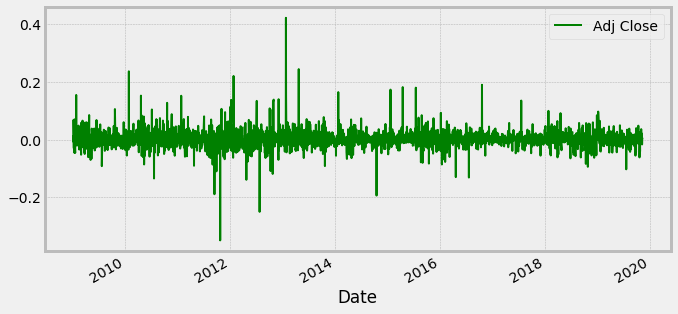

In [7]:
# Plot the returns which is the percentage change in adjusted closing price

plt.style.use('tableau-colorblind10')
df_nf.pct_change().plot(figsize=(10,5), color = 'green')

#### Uploading data

In [8]:
# Google Trends website, search for terms Golf, Soccer, Tennis, Hockey and Baseball

sports = pd.read_csv('sports.csv', skiprows = 2)
df_sp = pd.DataFrame(sports)

col_names = ['Month','Golf','Soccer','Tennis','Hockey','Baseball']

df_sp.columns = col_names

df_sp.head()

,Month,Golf,Soccer,Tennis,Hockey,Baseball
0,2004-01,45,21,14,22,24
1,2004-02,51,24,13,23,33
2,2004-03,64,28,16,23,45
3,2004-04,82,29,15,16,54
4,2004-05,83,32,17,14,54


In [9]:
df_sp.tail()

,Month,Golf,Soccer,Tennis,Hockey,Baseball
198,2020-07,63,13,10,6,26
199,2020-08,64,15,11,9,24
200,2020-09,56,17,19,9,22
201,2020-10,42,17,11,7,23
202,2020-11,35,13,8,6,11


In [10]:
df_sp.isna().sum()

Month       0
Golf        0
Soccer      0
Tennis      0
Hockey      0
Baseball    0
dtype: int64

In [11]:
df_sp.set_index('Month', inplace = True)
df_sp.describe()

,Golf,Soccer,Tennis,Hockey,Baseball
count,203.000000,203.000000,203.000000,203.000000,203.000000
mean,49.955665,28.512315,13.541872,14.753695,34.034483
std,18.358180,9.302060,4.140117,6.100513,14.378332
min,24.000000,9.000000,7.000000,5.000000,11.000000
25%,34.000000,23.000000,11.000000,10.000000,22.500000
50%,49.000000,28.000000,13.000000,15.000000,31.000000
75%,61.000000,32.000000,16.000000,18.000000,46.500000
max,100.000000,85.000000,27.000000,56.000000,64.000000


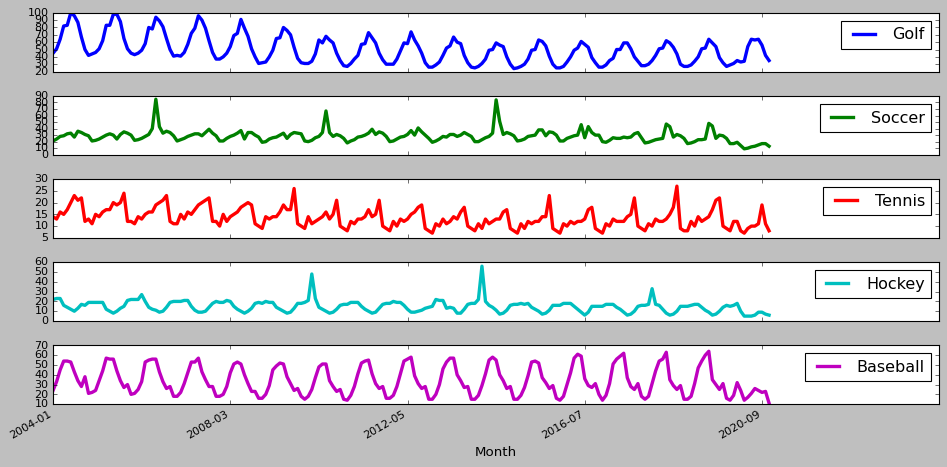

In [12]:
plt.style.use('classic')
df_sp.plot(figsize = (12,6), fontsize = 10, linewidth = 3, subplots = True)
plt.tight_layout()

### Time Series Data and Relationships

We will look at the following 5 datasets:

1. Google Trends. It's basically a term search count of the word "vacation".
2. Retail Furniture and furnishing sales data in millions of dollars. 
3. Adjusted clothes stock price for Bank of America. 
4. Adjusted clothes stock price for JP Morgan bank.
5. The monthly average temperature in Fahrenheit for St. Louis.

#### Example 1: Vacation dataset

In [13]:
vacation = pd.read_csv('vacation.csv',skiprows = 2)

df_v = pd.DataFrame(vacation)
# df_v.rename(columns = {'vacation: (United States)':'vacation'}, inplace = True)
col_names = ['month','num_search_vacation']
df_v.columns = col_names
df_v.head()

,month,num_search_vacation
0,2004-01,97
1,2004-02,88
2,2004-03,84
3,2004-04,77
4,2004-05,85


In [14]:
# Check for missing values
df_v.isna().sum()

month                  0
num_search_vacation    0
dtype: int64

In [15]:
from datetime import datetime

df_v['month'] = pd.to_datetime(df_v['month'])
df_v.set_index('month', inplace = True)

In [16]:
df_v.head(3)

,num_search_vacation
month,
2004-01-01,97
2004-02-01,88
2004-03-01,84


In [17]:
# Provide the descriptive (summary) statistics
# Generate descriptive statistics that summarize the central tendency, dispersion and shape of the dataset's
# distribution, excluding NaN values.
# Percentile values (quantile, 1, 2, 3) on numeric values

df_v.describe()

,num_search_vacation
count,203.000000
mean,57.793103
std,15.535541
min,26.000000
25%,49.000000
50%,55.000000
75%,68.000000
max,100.000000


In [18]:
# Calculate the median value (middle value), which is the 50th percentile value, quantile 2
# Mean > median implies that the data is right skewed
# Mean < median implies that the data is left skewed
df_v.median()

num_search_vacation    55.0
dtype: float64

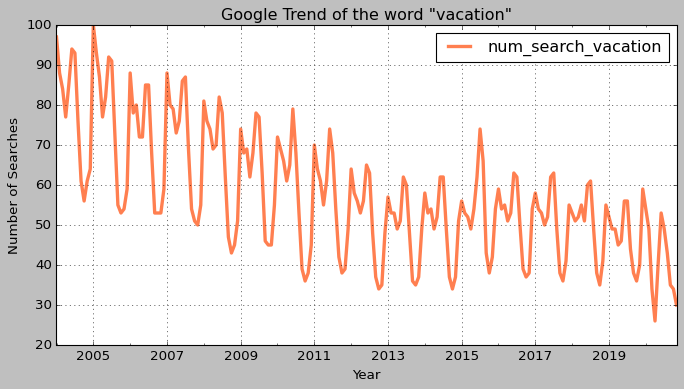

In [19]:
# Plot the time series of google searches of the word "vacation"

plt.style.use('seaborn-deep')

# #create Figure (empty Canvas)
# fig = plt.figure()

# # Add set of axes to the figure
# ax = fig.add_axes([0.1,0.1,0.8,0.9]) # left, bottom, width, height (range 0 to 1)

ax = df_v.plot(color = 'coral', grid = True, linewidth = 3, figsize=(10,5))

ax.set_xlabel('Year') # Notice the use of set_ to begin methods
ax.set_ylabel('Number of Searches')
ax.set_title('Google Trend of the word "vacation"')

plt.show()

Visually inspecting the time series above you can see that it trends downwards and then stabilizes around 2013. There is also periodic patterns or cycles with the low points in the search for the word "vacation", mostly occurring in October of each year, though occasionally it is in November as well. There's a notable spike in June 2015 with 75 counts of the search term "vacation". The grid lines help us to see that the pattern repeats every year.

In [20]:
# Check the options for fonts, lines, styles

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<AxesSubplot:ylabel='Frequency'>

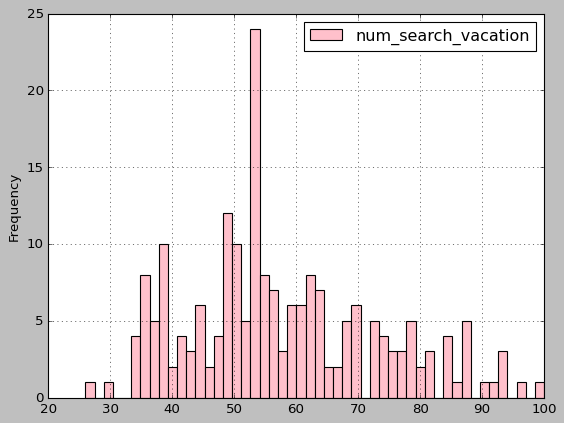

In [21]:
# Plot histogram (frequenct of counts), change num of bins to see different plots
df_v.plot(kind = 'hist', bins = 50, color = 'pink', grid = True)

<AxesSubplot:ylabel='Density'>

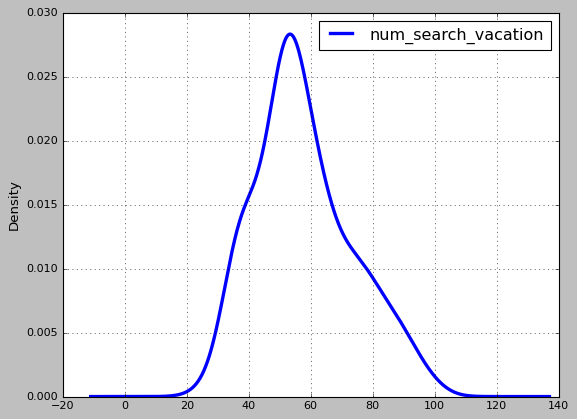

In [22]:
# Calculate Kernel Density Plot
# A density plot shows the distribution of the data over a continuous interval.
# Kernel Density Plot is a better way to display the distribution because it's not affected by the number of bins 
# used (each bar used in a typical histogram).

df_v.plot(kind = 'density', color = 'blue', grid = True, linewidth = 3, fontsize = 10)

#### Example 2: Average Temperature dataset

In [23]:
# Source: national Centerse for Environmental Information, National Oceanic and Atmospheric Administraion
# Source: https://www.ncdc.noaa.gov/cag/city/time-series/USW00013994/tavg/all/1/1930-2019?
# Average temperatures, all months, Saint Louis, Missouri, 1938-04 to 2019-01
# Anomaly: Departure from mean relative to the month (1938-2000) base period, Missing value is -99.0

In [24]:
temp = pd.read_csv('temperatures.csv', skiprows = 4, infer_datetime_format = True)

df_t = pd.DataFrame(temp)
col_names = ['date','avg_temp','anomaly']
df_t.columns = col_names

df_t.head()

,date,avg_temp,anomaly
0,193804,56.6,0.0
1,193805,64.9,-1.4
2,193806,73.5,-2.1
3,193807,80.5,0.9
4,193808,81.3,3.4


In [25]:
idx_pos = df_t.query('avg_temp == -99.0')
idx_pos

,date,avg_temp,anomaly
899,201303,-99.0,-143.8


In [26]:
df_t['avg_temp'].loc[898,]

35.1

In [27]:
df_t['avg_temp'].loc[900,]

54.9

In [28]:
new_avg_val = (df_t['avg_temp'].loc[898,] + df_t['avg_temp'].loc[900,]) / 2
new_avg_val

45.0

In [29]:
# let's first put NaN isntead of -99.0
df_t.at[899,'avg_temp'] = np.nan
df_t['avg_temp'].loc[899,]

nan

In [30]:
df_t.isna().sum()

date        0
avg_temp    1
anomaly     0
dtype: int64

In [31]:
# Lets use interpolation method to put a value in the NaN's place
df_t = df_t.interpolate(method = 'linear', limit_direction = 'forward')

# Check the value where the previous NaN originally coded as -99.0 was at
df_t['avg_temp'].loc[899,]

45.0

In [32]:
df_t.head()

,date,avg_temp,anomaly
0,193804,56.6,0.0
1,193805,64.9,-1.4
2,193806,73.5,-2.1
3,193807,80.5,0.9
4,193808,81.3,3.4


In [33]:
df_t['date'] = pd.to_datetime(df_t['date'], format = '%Y%m')

In [34]:
df_t.head()

,date,avg_temp,anomaly
0,1938-04-01,56.6,0.0
1,1938-05-01,64.9,-1.4
2,1938-06-01,73.5,-2.1
3,1938-07-01,80.5,0.9
4,1938-08-01,81.3,3.4


In [35]:
df_t.describe()

,avg_temp,anomaly
count,970.000000,970.000000
mean,56.307732,-0.141134
std,17.527659,5.947501
min,13.900000,-143.800000
25%,40.300000,-2.200000
50%,58.250000,0.000000
75%,73.100000,2.400000
max,87.500000,15.800000


In [36]:
# Subset the column of interest
df_at = df_t[['avg_temp']]
df_at.head()

,avg_temp
0,56.6
1,64.9
2,73.5
3,80.5
4,81.3


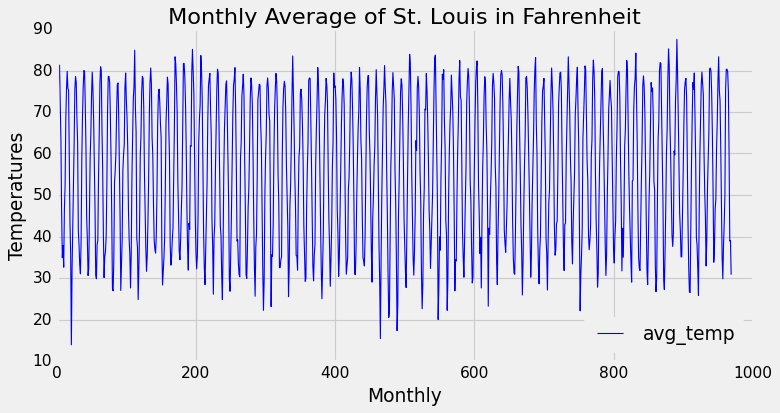

In [37]:
# Plot time series for the column of interest

plt.style.use('fivethirtyeight')

ax = df_at.plot(color = 'blue', grid = True, figsize = (10,5), linewidth = 1)

ax.set_xlabel('Monthly')
ax.set_ylabel('Temperatures')
ax.set_title('Monthly Average of St. Louis in Fahrenheit')

plt.show()

<AxesSubplot:ylabel='Frequency'>

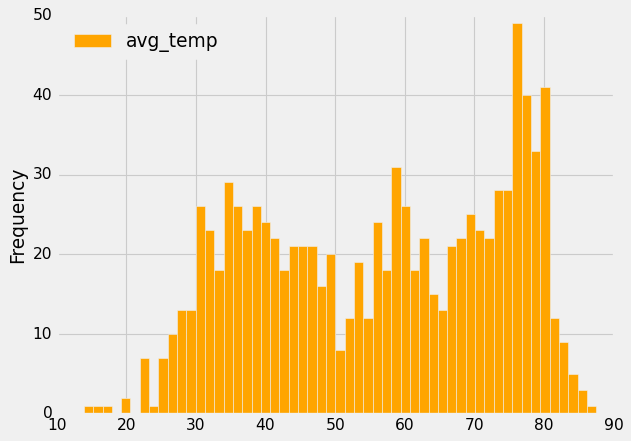

In [38]:
df_at.plot(kind = 'hist', bins = 55, color = 'orange', grid = True)

<AxesSubplot:ylabel='Density'>

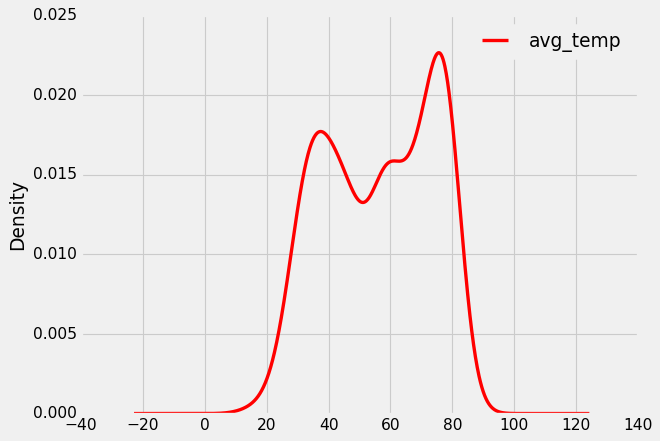

In [39]:
df_at.plot(kind = 'density', color = 'red', grid = True, linewidth = 3)

### Modelling and Decomposing Time Series Based on Trend and Seasonality

We will focus specifically on:
1. Components of a time series. We'll talk about trend, seasonality, and noise
2. Modelling time series (additive and multiplicative) 
3. Decomposing time series

Components of a Time Series:
A time series is composed of mainly trend, seasonality and noise. We will take a look at the component parts of time series, focusing on automated decomposition methods. This will give us some intuition about the components of time series.

*Trend*
When we talk about trend, we are talking about how the series data increases or decreases over time. Is it moving higher or lower over the time frame? The series is either uptrend or downtrend, both of which are non-stationary.

*Seasonality*
Seasonality refers to a repeating periodic or cyclical pattern with regular itnervals within series. The pattern is within a fixed time period and it repeats itself at regular intervals. There can be upward or downward swings but it continues to repeat over a fixed period of time as in cycle. Cycicality could repeat but it has no fixed point.

*Noise*
In general, noise captures the irregularities or random variation in the series. It can have erratic events or simple random variation. It has a short duration. It is hard to predict due to its erratic occurrence.

*Additive Model*: An additive model is linear. y(t) = Level + Trend + Seasonality + Noise. 
It is useful when the variations around the trend do not vary with the level of the time series. Components are added together.


*Multiplicative Model*: A multiplicative model is a non-linear: y(t) = Level * Trend * Seasonality * Noise. 
A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time. It is useful when the trend is proportional to the level of the time series. Components are multiplied together.

#### Decomposing Time Series

##### Application of Addictive Model

In [40]:
# Example 1: Google trends, numbers of searches of the word "vacation", time series shows seasonality 

from statsmodels.tsa.seasonal import seasonal_decompose

ts1 = df_v['num_search_vacation']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts1, model = 'additive', period = 12)

print(result.trend)
print(result.seasonal)
print(result.resid) 
print(result.observed)

month
2004-01-01   NaN
2004-02-01   NaN
2004-03-01   NaN
2004-04-01   NaN
2004-05-01   NaN
              ..
2020-07-01   NaN
2020-08-01   NaN
2020-09-01   NaN
2020-10-01   NaN
2020-11-01   NaN
Name: trend, Length: 203, dtype: float64
month
2004-01-01    10.572786
2004-02-01     5.648307
2004-03-01     4.051953
2004-04-01    -0.698047
2004-05-01     2.752474
                ...    
2020-07-01    13.169141
2020-08-01    -0.804818
2020-09-01   -14.198047
2020-10-01   -16.622526
2020-11-01   -14.122526
Name: seasonal, Length: 203, dtype: float64
month
2004-01-01   NaN
2004-02-01   NaN
2004-03-01   NaN
2004-04-01   NaN
2004-05-01   NaN
              ..
2020-07-01   NaN
2020-08-01   NaN
2020-09-01   NaN
2020-10-01   NaN
2020-11-01   NaN
Name: resid, Length: 203, dtype: float64
month
2004-01-01    97.0
2004-02-01    88.0
2004-03-01    84.0
2004-04-01    77.0
2004-05-01    85.0
              ... 
2020-07-01    49.0
2020-08-01    43.0
2020-09-01    35.0
2020-10-01    34.0
2020-11-01    30.0
Nam

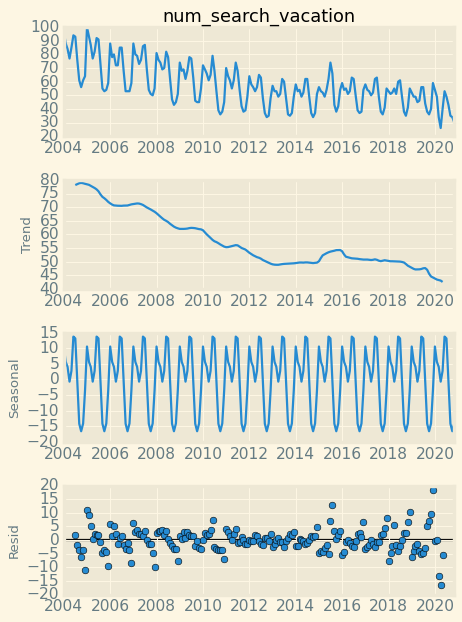

In [41]:
# Example 1: Google trends, numbers of searches of the word "vacation", time series shows seasonality 
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 6,8
plt.style.use('Solarize_Light2')

ts1 = df_v['num_search_vacation']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts1, model = 'additive', period = 12)
result.plot()
plt.tight_layout()
plt.show()

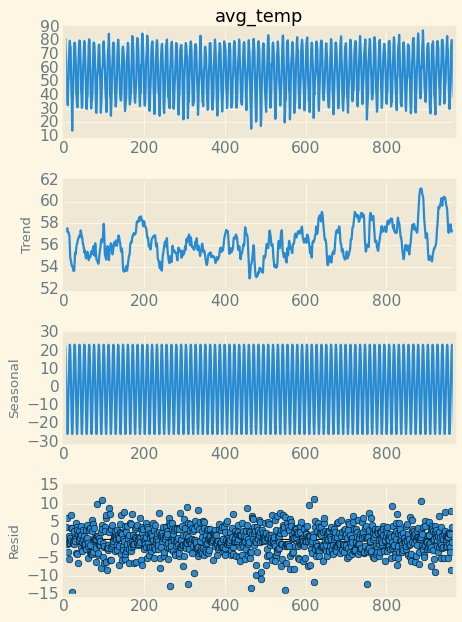

In [42]:
# Example 2: Average Temperature of St. Louis
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 6,8
plt.style.use('Solarize_Light2')

ts5 = df_t['avg_temp']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts5, model = 'additive', period = 12)
result.plot()
plt.tight_layout()
plt.show()

##### Application of Multiplicative Model

In [43]:
# Example 1: Google trends, numbers of searches of the word "vacation", time series shows seasonality 

from statsmodels.tsa.seasonal import seasonal_decompose

ts1 = df_v['num_search_vacation']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts1, model = 'multiplicative', period = 12)

print(result.trend)
print(result.seasonal)
print(result.resid) 
print(result.observed)

month
2004-01-01   NaN
2004-02-01   NaN
2004-03-01   NaN
2004-04-01   NaN
2004-05-01   NaN
              ..
2020-07-01   NaN
2020-08-01   NaN
2020-09-01   NaN
2020-10-01   NaN
2020-11-01   NaN
Name: trend, Length: 203, dtype: float64
month
2004-01-01    1.178802
2004-02-01    1.094083
2004-03-01    1.062842
2004-04-01    0.980448
2004-05-01    1.044965
                ...   
2020-07-01    1.226654
2020-08-01    0.986816
2020-09-01    0.755977
2020-10-01    0.712376
2020-11-01    0.758007
Name: seasonal, Length: 203, dtype: float64
month
2004-01-01   NaN
2004-02-01   NaN
2004-03-01   NaN
2004-04-01   NaN
2004-05-01   NaN
              ..
2020-07-01   NaN
2020-08-01   NaN
2020-09-01   NaN
2020-10-01   NaN
2020-11-01   NaN
Name: resid, Length: 203, dtype: float64
month
2004-01-01    97.0
2004-02-01    88.0
2004-03-01    84.0
2004-04-01    77.0
2004-05-01    85.0
              ... 
2020-07-01    49.0
2020-08-01    43.0
2020-09-01    35.0
2020-10-01    34.0
2020-11-01    30.0
Name: num_sear

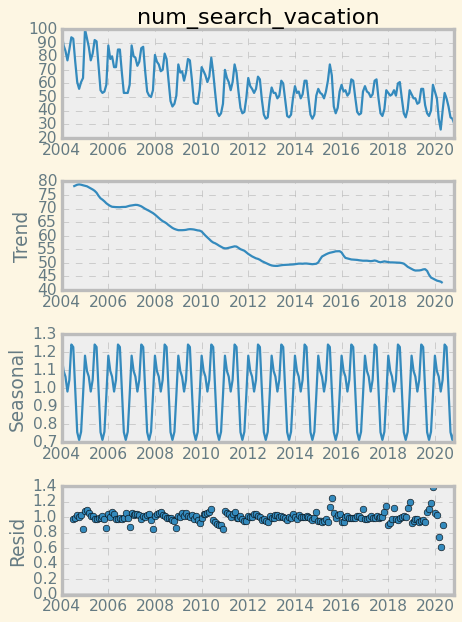

In [44]:
# Example 1: Google trends, numbers of searches of the word "vacation", time series shows seasonality 
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 6,8
plt.style.use('bmh')

ts1 = df_v['num_search_vacation']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts1, model = 'multiplicative', period = 12)
result.plot()
plt.tight_layout()
plt.show()

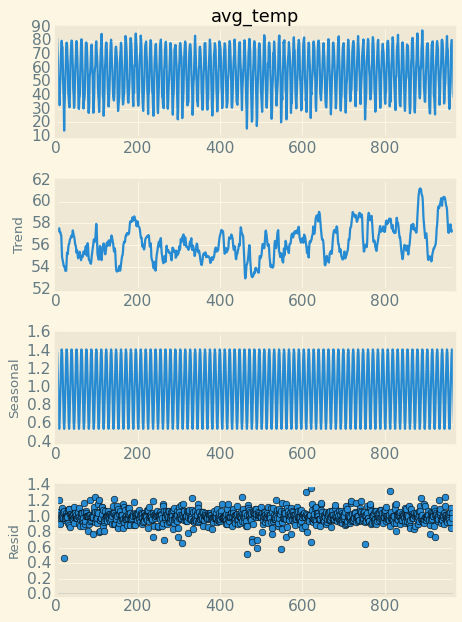

In [45]:
# Example 2: Average Temperature of St. Louis
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 6,8
plt.style.use('Solarize_Light2')

ts5 = df_t['avg_temp']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts5, model = 'multiplicative', period = 12)
result.plot()
plt.tight_layout()
plt.show()

### Approaches to Detrend and Deseasonalize a Time Series

1. Differencing (first difference, second difference, and substraction from the mean value)
2. Change in Percentage - typically called return with stock price data
3. Transformation (log transformation)- if you have a range of data that takes on many different values and the values themselves are big, a log transformation might be a good idea

When detrending and/or deseasonising a time series you may use one or a combination of approaches such as differencing, subtracting from the mean (or from a mean over a period), calculating percentage change, or using a transformation such as a log transformation. For instance, you make the first difference and then a log transformation or you may use a second difference. As you perform various operations (first dfference, second difference, subtracting the mean, log transformation, percentage), you will gain some intuition about how your data is being altered.

It is not always necessary to detrend and deseasonalise. Be aware that this may or may not apply to your particular data or domain. At times, you can work with the original data as it is.

#### Differencing

Differencing can help to reduce trend and seasonality. You can difference your data by substraction. You subtract away the previous period from the current period. Below you will see that the first observation has a NaN because there was no previous period.

In [46]:
# Google trends pn a search term "vacation" from 2004 to 2020
df_v.head()

,num_search_vacation
month,
2004-01-01,97
2004-02-01,88
2004-03-01,84
2004-04-01,77
2004-05-01,85


In [47]:
# Example of first differencing
df_v['first_diff'] = df_v['num_search_vacation'].diff()

df_v.head()

,num_search_vacation,first_diff
month,,
2004-01-01,97,NaN
2004-02-01,88,-9.0
2004-03-01,84,-4.0
2004-04-01,77,-7.0
2004-05-01,85,8.0


In [48]:
# Drop the NaN values

df_v.dropna(inplace = True)

In [49]:
df_v.describe()

,num_search_vacation,first_diff
count,202.000000,202.000000
mean,57.599010,-0.331683
std,15.325412,9.657513
min,26.000000,-23.000000
25%,49.000000,-6.000000
50%,54.500000,-1.000000
75%,68.000000,5.000000
max,100.000000,36.000000


In [50]:
# Example of second differencing

df_v['second_diff'] = df_v['num_search_vacation'].diff(2)
df_v.dropna(inplace = True)
df_v.describe()

,num_search_vacation,first_diff,second_diff
count,200.000000,200.000000,200.000000
mean,57.315000,-0.270000,-0.540000
std,15.132772,9.682762,15.334737
min,26.000000,-23.000000,-36.000000
25%,48.750000,-6.000000,-11.250000
50%,54.000000,-1.000000,-1.000000
75%,66.500000,5.000000,11.000000
max,100.000000,36.000000,39.000000


Comparing the mean and std deviation between the first and second difference, the first difference gives better results and should be sufficient to detrend and deseasonilise the series.

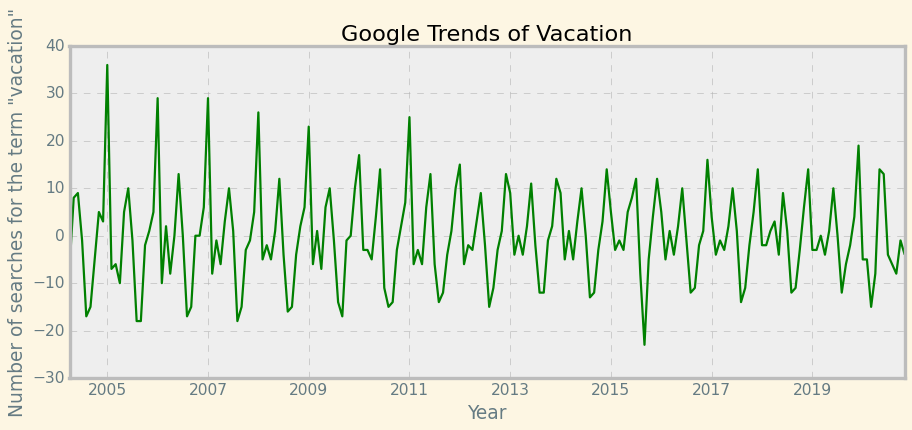

In [51]:
# Plot the time series

plt.style.use('bmh')

ax = df_v['first_diff'].plot(color = 'green', grid = True, figsize = (12,5), linewidth = 2)

ax.set_xlabel('Year')
ax.set_ylabel('Number of searches for the term "vacation"')
ax.set_title('Google Trends of Vacation')

plt.show()

<AxesSubplot:ylabel='Density'>

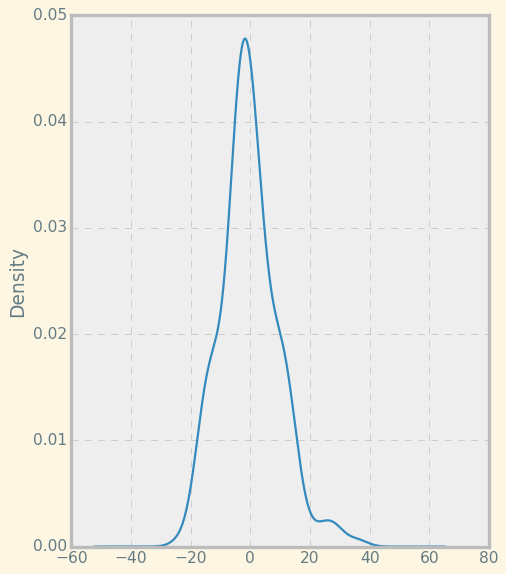

In [52]:
# Plot Kernel Density Plot

df_v['first_diff'].plot(kind = 'kde')

##### Examples of Subtraction from Mean

You can difference your data by subtraction. You subtract away the previous period from the current period. Below you will see that the first observation has an NaN because there was no previous period.

In [53]:
# Average Temperature of St. Louis
df_t.head()

,date,avg_temp,anomaly
0,1938-04-01,56.6,0.0
1,1938-05-01,64.9,-1.4
2,1938-06-01,73.5,-2.1
3,1938-07-01,80.5,0.9
4,1938-08-01,81.3,3.4


In [54]:
df_t['mean_diff'] = df_t['avg_temp'] - df_t['avg_temp'].mean()
df_t.head()

,date,avg_temp,anomaly,mean_diff
0,1938-04-01,56.6,0.0,0.292268
1,1938-05-01,64.9,-1.4,8.592268
2,1938-06-01,73.5,-2.1,17.192268
3,1938-07-01,80.5,0.9,24.192268
4,1938-08-01,81.3,3.4,24.992268


In [55]:
df_t.describe()

,avg_temp,anomaly,mean_diff
count,970.000000,970.000000,9.700000e+02
mean,56.307732,-0.141134,2.889418e-14
std,17.527659,5.947501,1.752766e+01
min,13.900000,-143.800000,-4.240773e+01
25%,40.300000,-2.200000,-1.600773e+01
50%,58.250000,0.000000,1.942268e+00
75%,73.100000,2.400000,1.679227e+01
max,87.500000,15.800000,3.119227e+01


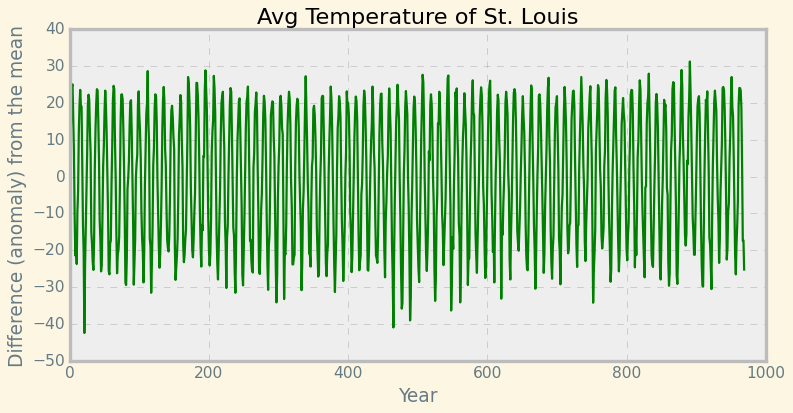

In [56]:
# Plot the series
plt.style.use('bmh')

ax = df_t['mean_diff'].plot(color = 'green', grid = True, figsize = (10,5))
ax.set_xlabel('Year')
ax.set_ylabel('Difference (anomaly) from the mean')
ax.set_title('Avg Temperature of St. Louis')

plt.show()

<AxesSubplot:ylabel='Density'>

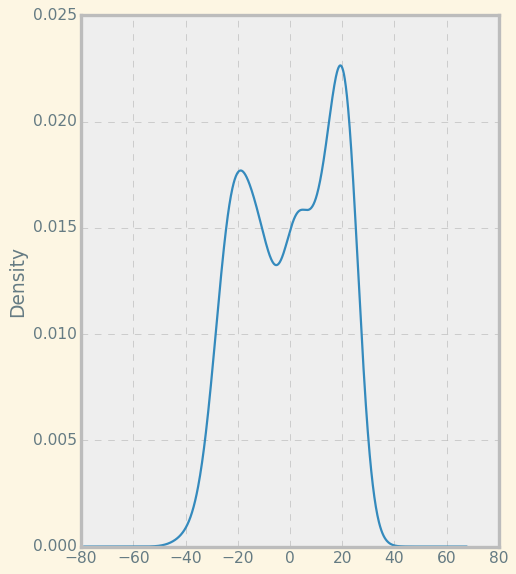

In [57]:
df_t['mean_diff'].plot(kind = 'density', grid = True, linewidth = 2)

#### Percentage Change

##### Furniture example

In [58]:
# Source: https://fred.stlouisfed.org/series/RSFHFSN
# Advance Retail Sales: Furniture and Home Furnishings Stores
# Units are in Millions of Dollars, not seasonally adjusted, prices
# Date period: 01.01.1992 to 01.09.2020

In [59]:
furniture = pd.read_csv('furniture.csv')
df_f = pd.DataFrame(furniture)

col_names = ['month','millions_of_dollars']
df_f.columns = col_names

df_f.head()

,month,millions_of_dollars
0,1992-01-01,3846
1,1992-02-01,3908
2,1992-03-01,4157
3,1992-04-01,4141
4,1992-05-01,4275


In [60]:
# Source: https://fred.stlouisfed.org/series/CPIAUCSL
# Consumer Price Index: All Items in US City Average, All Urban Consumers (CPIAUCSL)
# Index 1982-1984 = 100, Seasonally Adjusted
# Date period: 01.01.1992 to 01.09.2020, monthly
# Unit is millions of dollards

In [61]:
cpi = pd.read_csv('cpi_index.csv')

df_cpi = pd.DataFrame(cpi)
col_names = ['date','cpi']
df_cpi.columns = col_names
df_cpi.head()

,date,cpi
0,1992-01-01,138.3
1,1992-02-01,138.6
2,1992-03-01,139.1
3,1992-04-01,139.4
4,1992-05-01,139.7


In [62]:
df_cpi.drop(df_cpi.tail(1).index,inplace=True)

cpi_list = df_cpi['cpi'].to_list()

In [63]:
df_f['cpi'] = cpi_list
df_f.head()

,month,millions_of_dollars,cpi
0,1992-01-01,3846,138.3
1,1992-02-01,3908,138.6
2,1992-03-01,4157,139.1
3,1992-04-01,4141,139.4
4,1992-05-01,4275,139.7


In [64]:
# Store the last CPI value
sept2020_cpi = 260.209
sept2020_cpi

260.209

In [65]:
# Calculate the CPI for all months from 1992 to 2020 by dividing by the Sept 2020 CPI value

df_f['cpi_sept20_rate'] = df_f.cpi/sept2020_cpi
df_f.head()

,month,millions_of_dollars,cpi,cpi_sept20_rate
0,1992-01-01,3846,138.3,0.531496
1,1992-02-01,3908,138.6,0.532649
2,1992-03-01,4157,139.1,0.534570
3,1992-04-01,4141,139.4,0.535723
4,1992-05-01,4275,139.7,0.536876


In [66]:
# Calculate the furniture sales (millions of dollars) in terms of Spet 2020 dollars

df_f['furniture_price_adjusted'] = df_f['millions_of_dollars'] * df_f['cpi_sept20_rate']
df_f.head()

,month,millions_of_dollars,cpi,cpi_sept20_rate,furniture_price_adjusted
0,1992-01-01,3846,138.3,0.531496,2044.132985
1,1992-02-01,3908,138.6,0.532649,2081.591336
2,1992-03-01,4157,139.1,0.534570,2222.208686
3,1992-04-01,4141,139.4,0.535723,2218.429801
4,1992-05-01,4275,139.7,0.536876,2295.145441


In [67]:
df_f.month = pd.to_datetime(df_f.month)

df_f.set_index('month', inplace = True)

In [68]:
# Furniture sales in Millions of Dollars (adjusted to September 2020 prices)

df_f.head()

,millions_of_dollars,cpi,cpi_sept20_rate,furniture_price_adjusted
month,,,,
1992-01-01,3846,138.3,0.531496,2044.132985
1992-02-01,3908,138.6,0.532649,2081.591336
1992-03-01,4157,139.1,0.534570,2222.208686
1992-04-01,4141,139.4,0.535723,2218.429801
1992-05-01,4275,139.7,0.536876,2295.145441


In [69]:
df_f['furniture_pct_change'] = df_f['furniture_price_adjusted'].pct_change()
df_f.head()

,millions_of_dollars,cpi,cpi_sept20_rate,furniture_price_adjusted,furniture_pct_change
month,,,,,
1992-01-01,3846,138.3,0.531496,2044.132985,NaN
1992-02-01,3908,138.6,0.532649,2081.591336,0.018325
1992-03-01,4157,139.1,0.534570,2222.208686,0.067553
1992-04-01,4141,139.4,0.535723,2218.429801,-0.001701
1992-05-01,4275,139.7,0.536876,2295.145441,0.034581


In [70]:
df_f.dropna(inplace = True)

In [71]:
df_f.describe()

,millions_of_dollars,cpi,cpi_sept20_rate,furniture_price_adjusted,furniture_pct_change
count,344.000000,344.000000,344.000000,344.000000,344.000000
mean,7635.563953,199.589459,0.767035,6029.922755,0.010998
std,1699.600343,36.150847,0.138930,2149.451999,0.109829
min,3865.000000,138.600000,0.532649,2081.591336,-0.513479
25%,6604.250000,165.625000,0.636508,4314.255272,-0.032457
50%,7698.500000,201.550000,0.774570,6116.502919,0.023095
75%,8893.500000,233.066750,0.895691,7438.823489,0.074349
max,11297.000000,260.209000,1.000000,10928.366552,0.845346


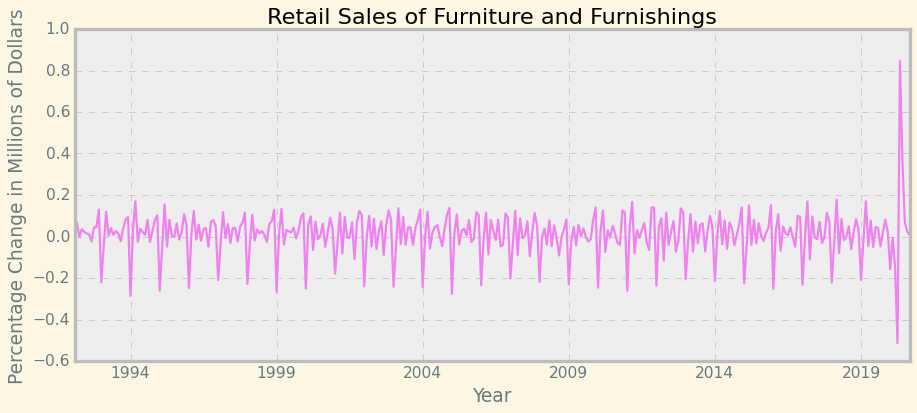

In [72]:
# Plot the time series

plt.style.use('bmh')

ax = df_f['furniture_pct_change'].plot(color = 'violet', grid = True, figsize = (12,5), linewidth = 2)

ax.set_xlabel('Year')
ax.set_ylabel('Percentage Change in Millions of Dollars')
ax.set_title('Retail Sales of Furniture and Furnishings')

plt.show()

<AxesSubplot:ylabel='Density'>

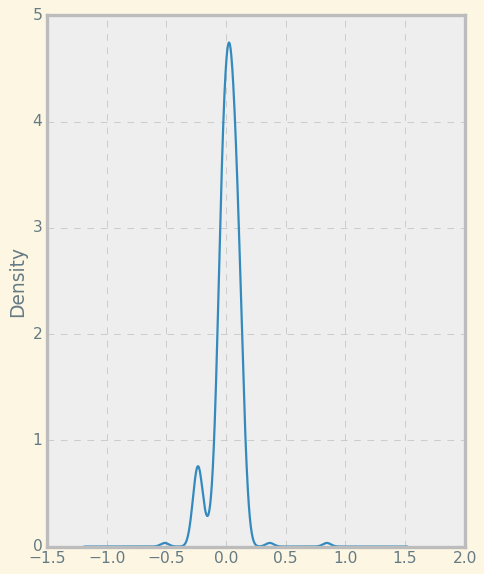

In [73]:
df_f['furniture_pct_change'].plot(kind = 'kde')

#### Log Transformation

In [74]:
df_f['furniture_log'] = np.log(df_f['furniture_price_adjusted'])
df_f.head()

,millions_of_dollars,cpi,cpi_sept20_rate,furniture_price_adjusted,furniture_pct_change,furniture_log
month,,,,,,
1992-02-01,3908,138.6,0.532649,2081.591336,0.018325,7.640888
1992-03-01,4157,139.1,0.534570,2222.208686,0.067553,7.706257
1992-04-01,4141,139.4,0.535723,2218.429801,-0.001701,7.704555
1992-05-01,4275,139.7,0.536876,2295.145441,0.034581,7.738551
1992-06-01,4357,140.1,0.538413,2345.866976,0.022099,7.760410


In [75]:
df_f.describe()

,millions_of_dollars,cpi,cpi_sept20_rate,furniture_price_adjusted,furniture_pct_change,furniture_log
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,7635.563953,199.589459,0.767035,6029.922755,0.010998,8.631026
std,1699.600343,36.150847,0.138930,2149.451999,0.109829,0.402077
min,3865.000000,138.600000,0.532649,2081.591336,-0.513479,7.640888
25%,6604.250000,165.625000,0.636508,4314.255272,-0.032457,8.369678
50%,7698.500000,201.550000,0.774570,6116.502919,0.023095,8.718745
75%,8893.500000,233.066750,0.895691,7438.823489,0.074349,8.914465
max,11297.000000,260.209000,1.000000,10928.366552,0.845346,9.299117


<AxesSubplot:xlabel='month'>

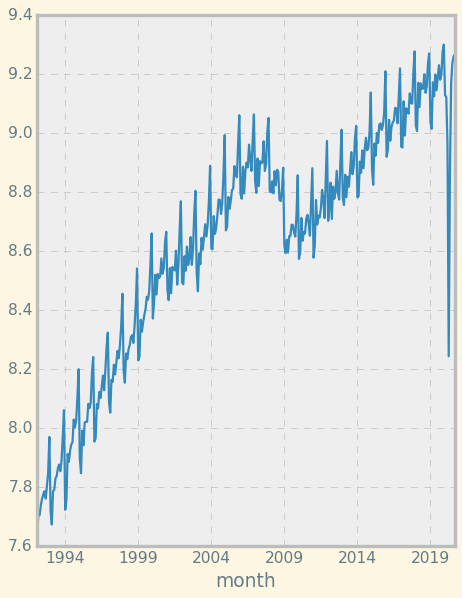

In [76]:
df_f['furniture_log'].plot()

<AxesSubplot:ylabel='Density'>

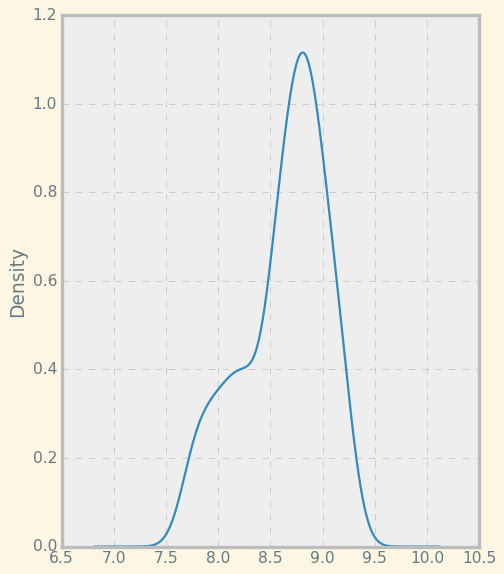

In [77]:
df_f['furniture_log'].plot(kind = 'kde')

### Correlation: Relationship between series

Types:

1. Low Correlation
2. Medium Correlation
3. High Correlation

Correlation is a measure of the direction and strength of a relationship. In this case, we are looking at two time series. Measurements are from -1 to 1 with 0 meaning no relationship or zero correlation between the two series. 1 emans a perfect, positive correlation, and -1 means a perfect, negative correlation. High correlations are toward 1 or -1 whereas low correlations are toward 0. In time series, one must be cautioned when viewing correlation, given the time period. You can imagine that on one day, there is strong, positive correlation but that the very next day, it could be a different story about the relationship between the two series.

#### Low Correlation

##### Google trends: Freedom and Choice

In [78]:
freedom_choice = pd.read_csv('freedom_choice.csv', skiprows = 1)

col_names = ['week','freedom','choice']
freedom_choice.columns = col_names

df_fc = pd.DataFrame(freedom_choice)
df_fc['week'] = pd.to_datetime(df_fc['week'], infer_datetime_format = True)

df_fc.set_index('week', inplace = True)

df_fc.head()

,freedom,choice
week,,
2004-01-01,61,54
2004-02-01,65,50
2004-03-01,64,52
2004-04-01,69,56
2004-05-01,70,53


In [79]:
df_fc.isna().sum()

freedom    0
choice     0
dtype: int64

In [80]:
df_fc.describe()

,freedom,choice
count,203.000000,203.000000
mean,56.502463,58.334975
std,5.114892,8.214097
min,45.000000,44.000000
25%,53.000000,52.000000
50%,56.000000,57.000000
75%,59.000000,63.500000
max,72.000000,100.000000


array([<AxesSubplot:xlabel='week'>, <AxesSubplot:xlabel='week'>],
      dtype=object)

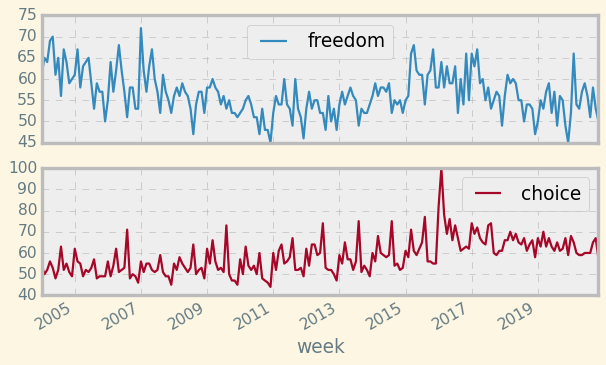

In [81]:
df_fc.plot(figsize = (8,5), subplots = True)

In [82]:
# Perform correlation

df_fc['freedom'].corr(df_fc['choice'])

0.06219399246976932

#### Medium Correlation

##### Google Trends: Materialism and Consumerism

In [83]:
mat_con = pd.read_csv('materialism_consumerism.csv', skiprows = 2)

col_names = ['month','materialism','consumerism']
mat_con.columns = col_names

df_mc = pd.DataFrame(mat_con)
df_mc['month'] = pd.to_datetime(df_mc['month'], infer_datetime_format = True)

df_mc.set_index('month', inplace = True)
df_mc.head()

,materialism,consumerism
month,,
2004-01-01,40,23
2004-02-01,68,60
2004-03-01,63,55
2004-04-01,72,60
2004-05-01,66,51


<AxesSubplot:xlabel='month'>

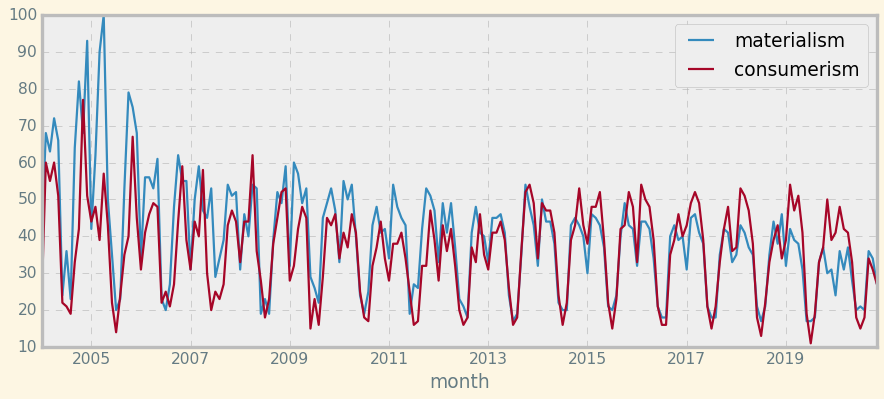

In [84]:
df_mc.plot(figsize = (12,5))

In [85]:
df_mc['materialism'].corr(df_mc['consumerism'])

0.7228740564242095

#### High Correlation

##### Google Trends: Growth and Economy

In [86]:
grow_eco = pd.read_csv('growth_economy.csv', skiprows = 2)

col_names = ['month','growth','economy']
grow_eco.columns = col_names

df_ge = pd.DataFrame(grow_eco)
df_ge['month'] = pd.to_datetime(df_ge['month'], infer_datetime_format = True)

df_ge.set_index('month', inplace = True)

df_ge.head()

,growth,economy
month,,
2004-01-01,88,56
2004-02-01,89,60
2004-03-01,93,64
2004-04-01,96,67
2004-05-01,90,68


In [87]:
df_ge.describe()

,growth,economy
count,203.000000,203.000000
mean,75.724138,46.591133
std,9.664816,10.233188
min,55.000000,28.000000
25%,69.500000,40.500000
50%,75.000000,47.000000
75%,82.500000,51.000000
max,100.000000,89.000000


### Autocorrelation: Relationship within Series

Why do we autocorrelate data?

Autocorrelation plots (Box and Jenkins, pp. 28-32) are a commonly-used tool for _checking randomness in a data set_. This randomness is ascertained by computing autocorrelations for data values at varying time lags. If random, such autocorrelations should be near zero for any and all time-lag separations.

1. White Noise
2. Autocorrelation function (ACF)
3. Partial autocorrelation function (PACF)

Much like correlation, autocorrelation gives a measure of the strength and direction of a relationship between two time series. Autocorrelation is done with a variable and its lag. It's a correlation with itself, hence autocorrelation. Basically, you are using the same time series and creating a second series, which is shifted by a time step. It is common to use the autocorrelation (ACF) plot to visualise the autocorrelation of a time-series. Let's start by taking a look at white noise:

#### White Noise, ACF, PACF

If your time series is statistically uncorrelated (independent) with zero mean and constant variance, then you have a particular type of noise called white noise.

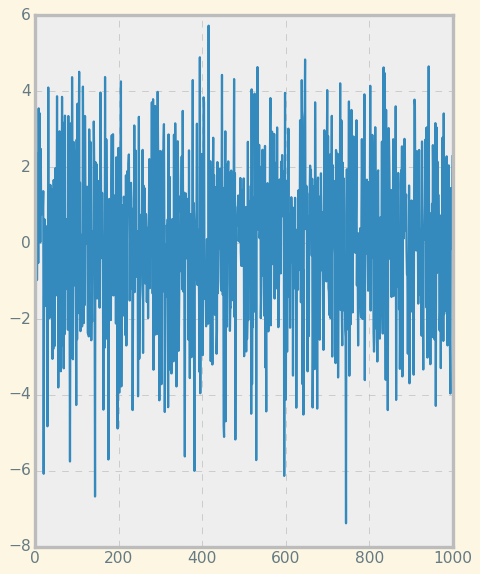

In [88]:
# loc is mean, scale is standard deviation
white_noise = np.random.normal(loc = 0, scale = 2, size = 1000)

plt.plot(white_noise)

In [89]:
white_noise.mean(), white_noise.std()

(0.001928377306393493, 2.066812640292876)

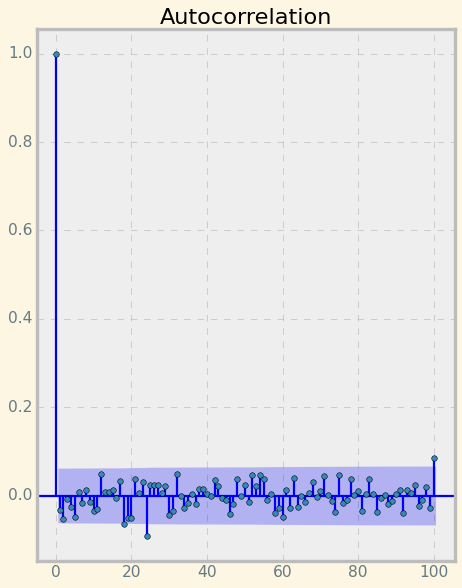

In [90]:
# Plot autocorrelation
from statsmodels.graphics.tsaplots import plot_acf
# Example of white noise autocorrelation (serial correlation)
plot_acf(white_noise, lags = 100);

Be aware that all the lags have close to zero autocorrelation so this means that lagged values cannot be used in prediction. All the lagged variables are random and are not useful for prediction.

##### Example 1: Vacation Data

In [91]:
df_v.head()

,num_search_vacation,first_diff,second_diff
month,,,
2004-04-01,77,-7.0,-11.0
2004-05-01,85,8.0,1.0
2004-06-01,94,9.0,17.0
2004-07-01,93,-1.0,8.0
2004-08-01,76,-17.0,-18.0


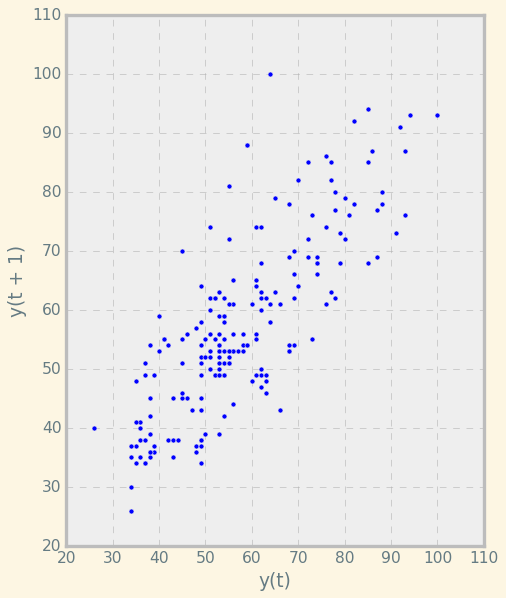

In [92]:
# Lag plot
from pandas.plotting import lag_plot

lag_plot(df_v['num_search_vacation'])
plt.show()

The plot above shows the vacation data on the y(t) against its previous time step, prior month, the y(t+1). You can think of the data shifted by a month and then plotted, removing the first data point. Clearly, we see a positive relationship, though it has a broader range of scatter.

In [93]:
# Autocorrelation
autocorrelation = df_v['num_search_vacation'].autocorr()
autocorrelation

0.7932143811576305

The correlation between the vacation data and it lag variable by a time step shows generally medium to high correlation at 0.80. This indicates that there is a substantial, positive relationship.

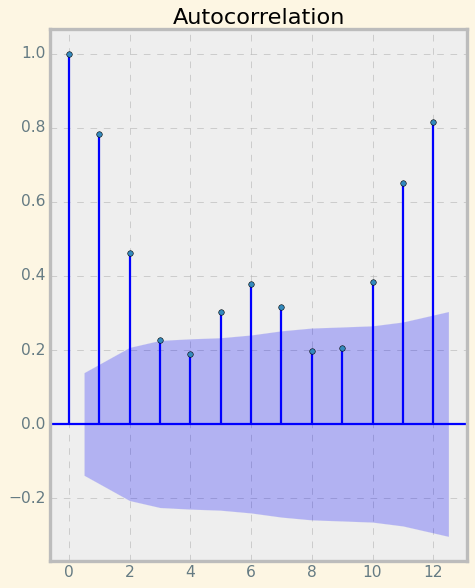

In [94]:
# Plot ACF to visualise the autocorrelation
plot_acf(df_v['num_search_vacation'], lags = 12);

The partial autocorrelation function (PACF) gives the partial correlation of a time series with its own lagged values. It controls for other lags. The idea for the PACF is taht we perform correlation between a variable and itself lagged and then we subtract that effect from the variable and then find out what residual correlation is left over from that variable and further lags. For example, a PACF of order 3 returns the correlation between our time series (t1,t2,t3,..) and its own values lagged by 3 time points (t4,t5,t6,..) but only after removing all effects attributable to lags 1 and 2.

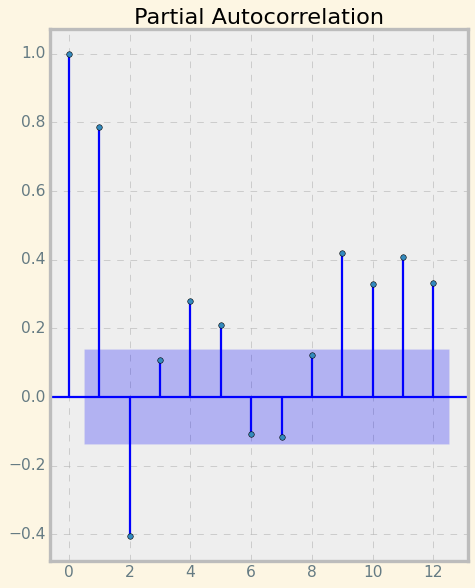

In [95]:
# Plot Partial autocorrelation function (PACF)

from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df_v['num_search_vacation'],lags = 12);

If partial autocorrelation values are close to 0, then values between observations and lagged observations are not correlated with one another. Inversely, partial autocorrelations with values close to 1 or -1 indicate that there exists strong positive or negative correlations between the lagged observations of the time series.


The .plot_pacf() function also returns confidence intervals, which are represented as blue shaded regions. If partial autocorrelation values are beyond this confidence interval regions, then you can assume that the observed partial autocorrelation values are statistically significant.

##### Example 2: Furniture Data

In [96]:
df_f.head()

,millions_of_dollars,cpi,cpi_sept20_rate,furniture_price_adjusted,furniture_pct_change,furniture_log
month,,,,,,
1992-02-01,3908,138.6,0.532649,2081.591336,0.018325,7.640888
1992-03-01,4157,139.1,0.534570,2222.208686,0.067553,7.706257
1992-04-01,4141,139.4,0.535723,2218.429801,-0.001701,7.704555
1992-05-01,4275,139.7,0.536876,2295.145441,0.034581,7.738551
1992-06-01,4357,140.1,0.538413,2345.866976,0.022099,7.760410


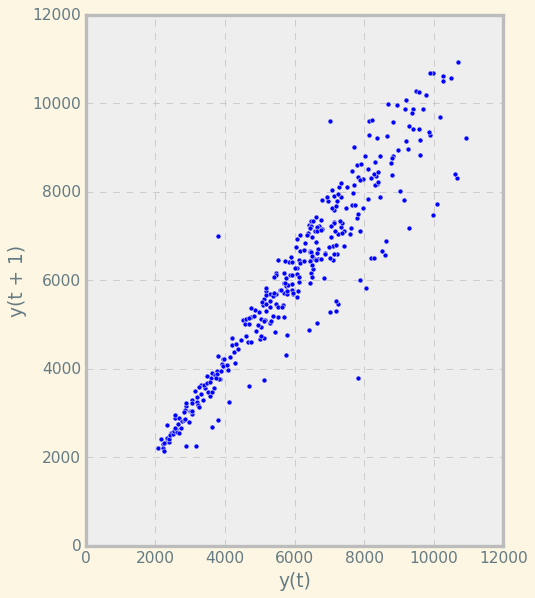

In [97]:
# Lag Plot

lag_plot(df_f['furniture_price_adjusted'])
plt.show()

The plot above shows the furniture data aginst its previous time step, prior month. You can think of the data shifted by a month and then plotted, removing the first data point. Clearly, we see a positive relationship.

In [98]:
# Autocorrelation

df_f['furniture_price_adjusted'].autocorr()

0.943578434986159

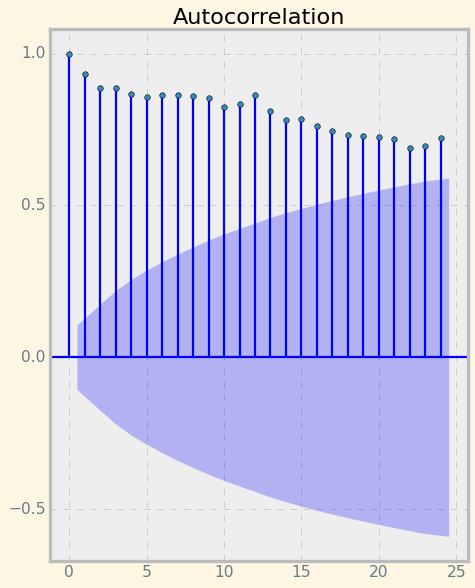

In [99]:
# Plot ACF
plot_acf(df_f['furniture_price_adjusted'], lags = 24);

The x-axis shows the number of lags where the y-axis shows the correlation value. Note that correlation measure runs from -1 to 1. The results show positive correlation. The scores all extend beyond the blue shaded region, which denotes statistical significance. For each time period, the measure is of its current time value's with its prior time value. It shows strong positive, autocorrelation up to 24 lags.

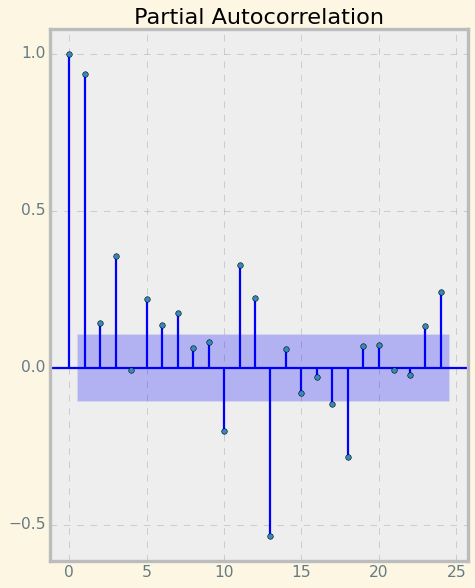

In [100]:
# Partial Autocorrelation Function
plot_pacf(df_f['furniture_price_adjusted'], lags = 24);

Strong partial autocorrelation at the first two lags. The candlesticks extend beyond the margin of uncertainty for lags 3 and 4 as well as 11 and 12, going i the positive direction. In terms of negative correlation, lag 10, 13 and 18 show statistical significance in terms of negative correlation.

### Operating with Time Series Models: Stationarity in Time Series

In certain situations, you may need to make stationary your data, but there are certainly no hard and fast rules. You can achieve stationarity when you remove trend and seasonality such that you have constant mean and variance. In particular data domains and situations, your time series data may need to be made stationary before applying any statistical analysis. But, be aware that even "weakly" stationary data can also be acceptable. So of course, you can always work with the original data and then compare those results against the data that has been made stationary. 

**Augmented Dickey - Fuller Test**

To model a time series, it can be stationary or weakly stationary. The distribution of the data does not change over time. The series has zero trend, the variance is constant, and the autocorrelation is constant. The augmented Dicket-Fuller Test is a statistical test for non-stationarity. The null hypothesis is that the time seris is non-stationary due to trend.

In [101]:
from statsmodels.tsa.stattools import adfuller

The more negative the test-statistic, then it is more likely that the data is stationary. For the p-value, if it is small such that it is below 0.05, then we reject the null hypothesis. This means we assume that the time series must be stationary. For the critical values, if we want a p-value of 0.05 or below, our test statistic needs to be below the corresponding critical value.

##### Example 1: Vacation data, first difference

In [102]:
df_v.head()

,num_search_vacation,first_diff,second_diff
month,,,
2004-04-01,77,-7.0,-11.0
2004-05-01,85,8.0,1.0
2004-06-01,94,9.0,17.0
2004-07-01,93,-1.0,8.0
2004-08-01,76,-17.0,-18.0


In [103]:
# Run test
vacation_result = adfuller(df_v['first_diff'])

# Print the test statistic
print(vacation_result[0])

# Print the p-value
print(vacation_result[1])

# Print the critical values for the test statistic for 1%, 5% and 10%
print(vacation_result[4])

-5.910013848462733
2.6524700580171246e-07
{'1%': -3.465620397124192, '5%': -2.8770397560752436, '10%': -2.5750324547306476}


The p-value is very very low (2.65 e to the power of negative 7) which is definitely lower than the 0.05 threshold therefore we reject the null and claim that the series is stationary.

##### Example 2: Furniture data, percentage change

In [104]:
df_f.head()

,millions_of_dollars,cpi,cpi_sept20_rate,furniture_price_adjusted,furniture_pct_change,furniture_log
month,,,,,,
1992-02-01,3908,138.6,0.532649,2081.591336,0.018325,7.640888
1992-03-01,4157,139.1,0.534570,2222.208686,0.067553,7.706257
1992-04-01,4141,139.4,0.535723,2218.429801,-0.001701,7.704555
1992-05-01,4275,139.7,0.536876,2295.145441,0.034581,7.738551
1992-06-01,4357,140.1,0.538413,2345.866976,0.022099,7.760410


In [105]:
# Run the test
furniture_result = adfuller(df_f['furniture_pct_change'])

# Print the test statistic
print(furniture_result[0])

# Print the p-value
print(furniture_result[1])

# Print the critical values for the test statistic at 1%, 5% and 10%
print(furniture_result[4])

-3.714653211338953
0.003911701464602107
{'1%': -3.4503224123605194, '5%': -2.870338478726661, '10%': -2.571457612488522}


### Autoregression (AR) and Moving Average (MA) Models

**Autogression model (AR)**: It is a rergession between a time series and itself lagged by a time step or steps

**Moving Average model (MA)**: It is a regression between a time series and its own residuals lagged by a time step or steps

**ARMA model**: It is a combination of AR and MA.


**AR and MA Models**:

In time series, autoregression(AR) and moving average(MA) models provide a simple description of a process in terms of two factors - one for autoregression and the other for moving average. The AR part entails regressing the variable on its own lagged values. The idea is that the previous time period's value can help us predict the current time period's value. The MA part involves modelling the error term as a linear combination of error terms occuring at the same time step and at vaious times in the past.

**Autoregression Models**

Autogressive (AR) model is when present value of a time series can be predicted from using previous values of the same series. It's a regression using its same series, though shifted by a time step, called a lag. The present value is a weighted average of its past values. Both the t-1 and t-2 are lags of the time series y. The error terms (noise) is represented as e. The values a1 and a2 are the coefficients of the model.

AR(1) model: $y_t$ = $a_1$$y_(t-1)$ + $e_t$

AR(2) model: $y_t$ = $a_1$$y_(t-1)$ + $a_2$$y_(t-2)$ + $e_t$

We typically represent the order of the model as p for an AR model such as AR(p).


**Moving Average Models**

Moving average (MA) is a process where the present value of a time series, y, is defined as a linear combination of past errors. The error term (noise) is represetned as e. Both the t-1 and t-2 are lags of the time on the errors.

MA(1) Model: $y_t$ = $m_1$$e_(t-1)$ + $e_t$

MA(2) Model: $y_t$ = $m_1$$e_(t-1)$ + $m_2$$e_(t-2)$ + $e_t$

We typically represent the order of the model as q for an MA model such as MA(q).


**ARMA Models**

We can combine both Autoregressive and Moving Average models together to create an ARMA model. The time series is regressed on the previous values and the previous errors.

ARMA(1,1) model = $y_t$ = $a_1$$y_(t-1)$ + $m_1$$e_(t-1)$

For ARMA(p,q), p is the order of the AR process and q is the order of the MA process.

#### Examples:

In [106]:
# This is example code
from statsmodels.tsa.arima_model import ARMA

# model = ARMA(timeseries, order = (p,q)) # General model

# ar_model = ARMA(timeseries, order = (2,0)) # AR model

# ma_model = ARMA(timeseries, order = (0,2)) # MA model

# model = ARMA(timeseries, order = (3,1)) # This means that the AR has 3 lags and MA has 1 lag.

# results = model.fit() # fit the model
# print(results.summary) # print out the summary results

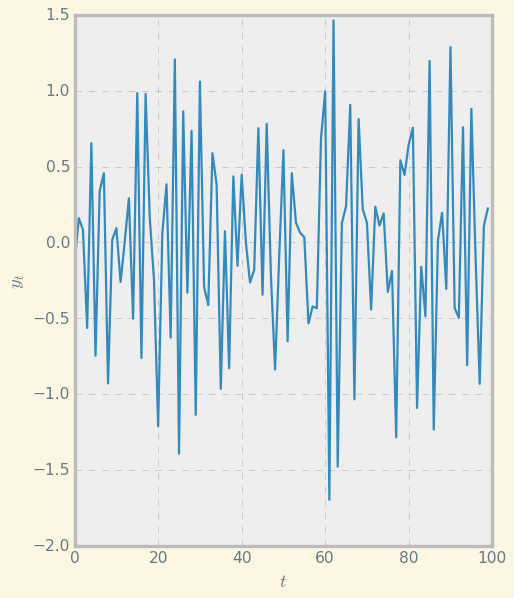

In [107]:
# simulatione example

# https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_process.arma_generate_sample.html

# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(41)

# Set ar_coefs and ma_coefs for an MA(1) model with MA lag -1 coefficient of -0.8
ar_coefs = [1] # Remember to set the lag-0 coefficients to 1.
ma_coefs = [1, -0.8] # Remember to set the lag-0 coefficients to 1.

# Generate data, scale is the standard deviation of the errors
data = arma_generate_sample(ar_coefs, ma_coefs, nsample = 100, scale = 0.5)

plt.plot(data)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

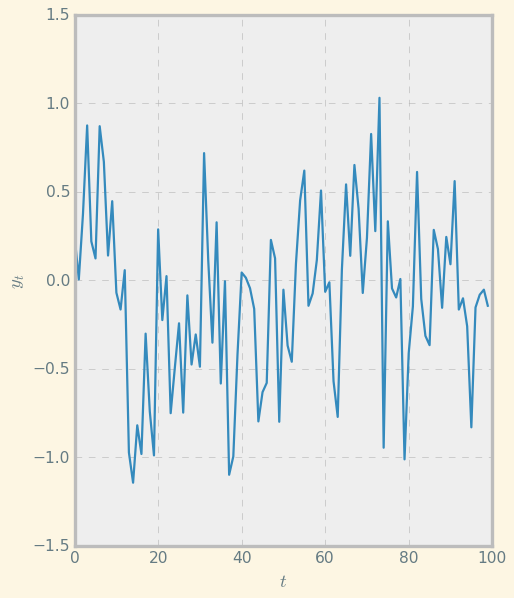

In [108]:
# AR(2) model is just an ARMA(2,0) model

# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(42)

# Set ar_coefs and ma_coefs for an AR(2) model with AR lag-1 and lag-2 coefficients of 0.3 and 0.2 respectively
ar_coefs = [1, -0.3, -0.2] # Remember to flip the sign of the coefficients.
ma_coefs = [1] # Remember to set the lag-0 coefficients to 1.

# Generate data, scale is the standard deviation of the errors
data = arma_generate_sample(ar_coefs, ma_coefs, nsample = 100, scale = 0.5)

plt.plot(data)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

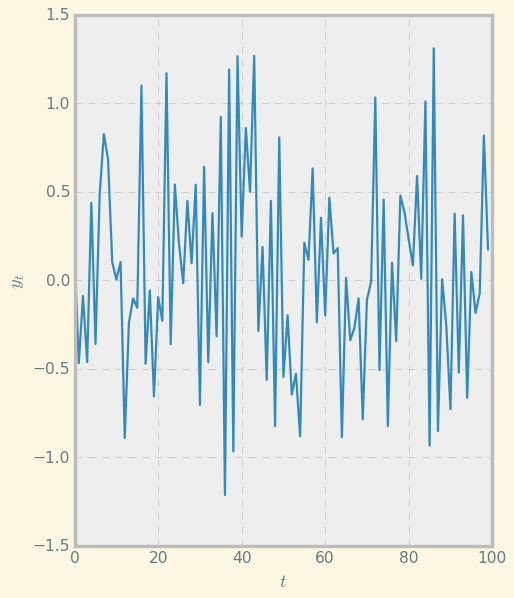

In [109]:
# Set the coefficients for a model with from yt = -0.3yt-1 + 0.2et-1 + 0.4et-2 + et.

# Import data generation function and set random seed.
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(43)

ar_coefs = [1, 0.3] # Remember for lags greater than 0, we need to flip the sign
ma_coefs = [1, 0.2, 0.4] # here we don't flip since these are coefficients of errors

# generate data
data = arma_generate_sample(ar_coefs, ma_coefs, nsample = 100, scale = 0.5)

plt.plot(data)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

### Estimating an AR Model

An autoregression model is a regression with a time series and itself, shifted by a time step or steps. These are called lags. I will demonstrate with five examples with the non-stationarized datasets so that you can see the results in the original dataset along with the forecasted dataset.

#### Example 1: Vacation dataset

In [110]:
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import lag_plot

df_v.head()

,num_search_vacation,first_diff,second_diff
month,,,
2004-04-01,77,-7.0,-11.0
2004-05-01,85,8.0,1.0
2004-06-01,94,9.0,17.0
2004-07-01,93,-1.0,8.0
2004-08-01,76,-17.0,-18.0


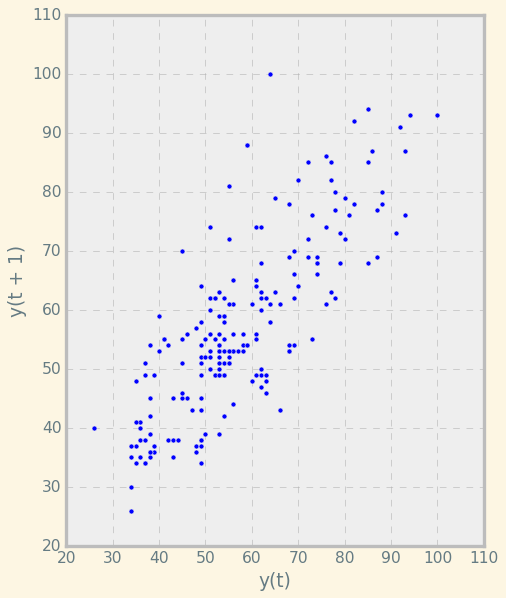

In [111]:
# Plot the time series against its lag
lag_plot(df_v['num_search_vacation'])
plt.show()

In [112]:
# Find the correlation of the time series with its lag
values = pd.DataFrame(df_v['num_search_vacation'].values)
dataframe = pd.concat([values.shift(1),values], axis = 1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.793214
t+1  0.793214  1.000000


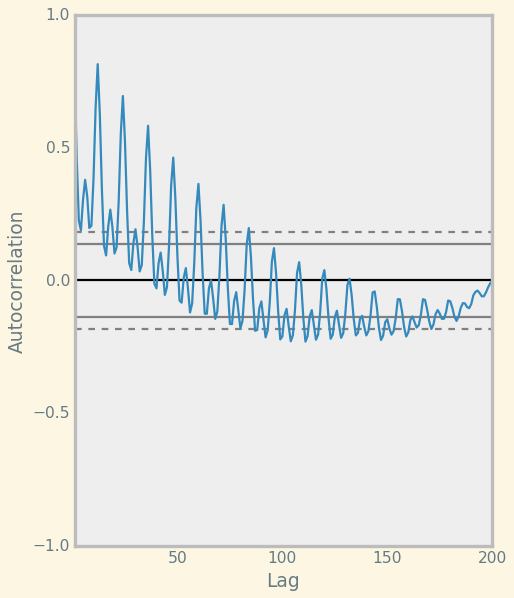

In [113]:
# Plot the autocorrelation of the dataset
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_v['num_search_vacation'])
plt.show()

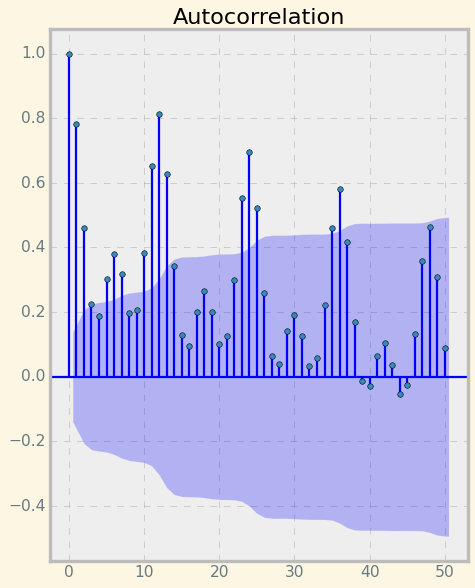

In [114]:
# Plot the autocorrelation function
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_v['num_search_vacation'], lags = 50);
plt.show()

In [115]:
# Estimate the AR(1) model

# import the ARMA module from statsmodals
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
mod = ARMA(df_v['num_search_vacation'], order = (1,0)) # fit data to AR(1) model
res = mod.fit()

# Print result summary
print(res.summary())
# Print result parameters - are they close to true parameters?
print(res.params)

                               ARMA Model Results                              
Dep. Variable:     num_search_vacation   No. Observations:                  200
Model:                      ARMA(1, 0)   Log Likelihood                -727.988
Method:                        css-mle   S.D. of innovations              9.193
Date:                 Wed, 06 Jan 2021   AIC                           1461.976
Time:                         07:09:14   BIC                           1471.871
Sample:                     04-01-2004   HQIC                          1465.980
                          - 11-01-2020                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        57.1691      3.172     18.022      0.000      50.952      63.386
ar.L1.num_search_vacation     0.7990      0.043     18.538      0.000       0.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

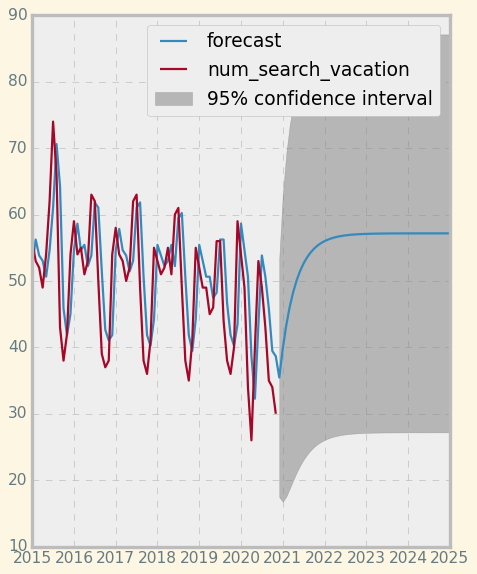

In [116]:
# Forecasting

res.plot_predict(start = '2015', end = '2025')
plt.show()

### Estimating an MA Model

Moving Average model was described as a regression between a time series and its lagged error term. By specifying an order, we set the number of lags.

#### Example 1: Vacation dataset

In [117]:
df_v.head()

,num_search_vacation,first_diff,second_diff
month,,,
2004-04-01,77,-7.0,-11.0
2004-05-01,85,8.0,1.0
2004-06-01,94,9.0,17.0
2004-07-01,93,-1.0,8.0
2004-08-01,76,-17.0,-18.0


In [118]:
# Estimate moving average

# Import ARMA
from statsmodels.tsa.arima_model import ARMA

mod = ARMA(df_v['num_search_vacation'], order = (0,1))
res = mod.fit()

print(res.summary())
print(res.params)

                               ARMA Model Results                              
Dep. Variable:     num_search_vacation   No. Observations:                  200
Model:                      ARMA(0, 1)   Log Likelihood                -749.363
Method:                        css-mle   S.D. of innovations             10.235
Date:                 Wed, 06 Jan 2021   AIC                           1504.726
Time:                         07:09:14   BIC                           1514.621
Sample:                     04-01-2004   HQIC                          1508.730
                          - 11-01-2020                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        57.2715      1.263     45.353      0.000      54.796      59.747
ma.L1.num_search_vacation     0.7486      0.033     22.880      0.000       0.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

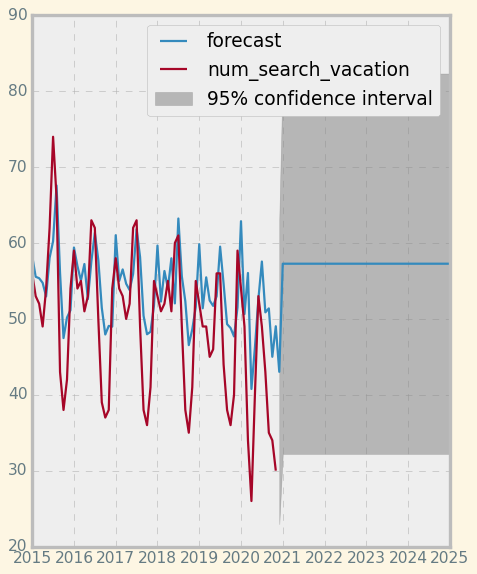

In [119]:
# Forecast

res.plot_predict(start = '2015', end = '2025')
plt.show()

### Building an ARMA model

We will put autoregression and moving average models together in combination. AR(p) models try to explain the momentum and mean reversion effects. MA(q) models try to capture the shock effects observed in the white noise terms. These effects are unexpected or surprise events, hence anomalies.

#### Example 1: Vacation dataset

In [120]:
df_v.head()

,num_search_vacation,first_diff,second_diff
month,,,
2004-04-01,77,-7.0,-11.0
2004-05-01,85,8.0,1.0
2004-06-01,94,9.0,17.0
2004-07-01,93,-1.0,8.0
2004-08-01,76,-17.0,-18.0


In [121]:
mod = ARMA(df_v['num_search_vacation'], order = (1,1))
res = mod.fit()

print(res.summary())

print(res.params)

                               ARMA Model Results                              
Dep. Variable:     num_search_vacation   No. Observations:                  200
Model:                      ARMA(1, 1)   Log Likelihood                -712.067
Method:                        css-mle   S.D. of innovations              8.483
Date:                 Wed, 06 Jan 2021   AIC                           1432.134
Time:                         07:09:14   BIC                           1445.327
Sample:                     04-01-2004   HQIC                          1437.473
                          - 11-01-2020                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        57.1793      2.587     22.103      0.000      52.109      62.250
ar.L1.num_search_vacation     0.6725      0.060     11.227      0.000       0.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

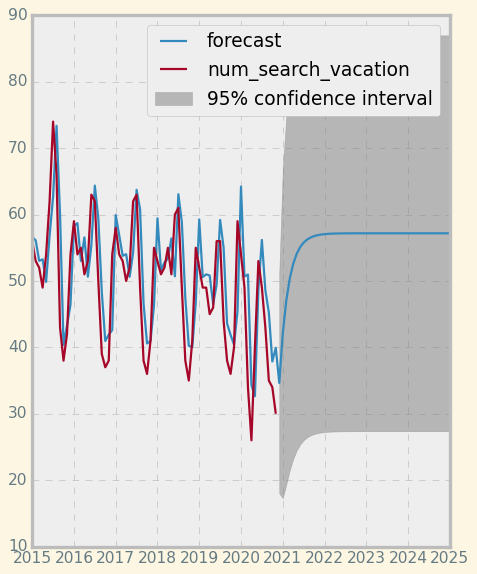

In [122]:
res.plot_predict(start = '2015', end = '2025');
plt.show()

#### Example 2: Furniture dataset

In [123]:
df_f.head()

,millions_of_dollars,cpi,cpi_sept20_rate,furniture_price_adjusted,furniture_pct_change,furniture_log
month,,,,,,
1992-02-01,3908,138.6,0.532649,2081.591336,0.018325,7.640888
1992-03-01,4157,139.1,0.534570,2222.208686,0.067553,7.706257
1992-04-01,4141,139.4,0.535723,2218.429801,-0.001701,7.704555
1992-05-01,4275,139.7,0.536876,2295.145441,0.034581,7.738551
1992-06-01,4357,140.1,0.538413,2345.866976,0.022099,7.760410


In [124]:
mod = ARMA(df_f['furniture_price_adjusted'], order = (1,1))
res = mod.fit()

print(res.summary())
print(res.params)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

                                 ARMA Model Results                                 
Dep. Variable:     furniture_price_adjusted   No. Observations:                  344
Model:                           ARMA(1, 1)   Log Likelihood               -2725.147
Method:                             css-mle   S.D. of innovations            663.395
Date:                      Wed, 06 Jan 2021   AIC                           5458.294
Time:                              07:09:15   BIC                           5473.657
Sample:                          02-01-1992   HQIC                          5464.413
                               - 09-01-2020                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           5906.2407   2798.634      2.110      0.035     421.019    1.14e+04
ar.L1.furniture_price_a

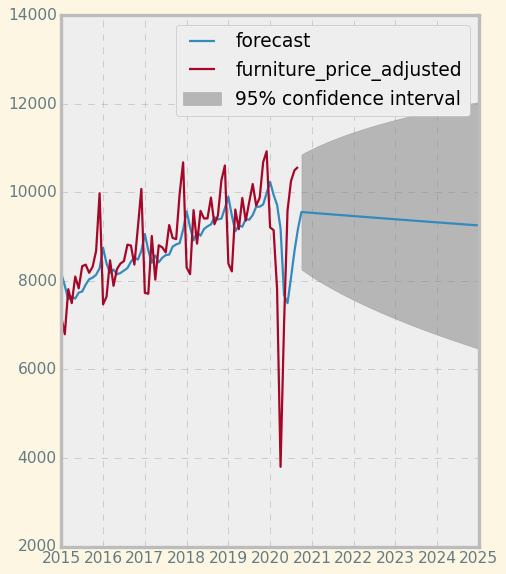

In [125]:
res.plot_predict(start = '2015', end = '2025');
plt.show()